<a href="https://colab.research.google.com/github/neetigithub/9th-work/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
print("With scaling: ")
urls = {'normal':"https://raw.githubusercontent.com/saranshtaneja/genetic_major/master/fb_dataset.csv",
        'ga':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_ga.csv',
        'pso':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_pso.csv',
        'bat':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_bat.csv',
        'dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_dragon.csv',
        'ga+bat':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_ga%2Bbat.csv',
        'pso+bat':'https://github.com/manan-arya/Major_Project/raw/pso%2B/after_pso%2Bbat.csv',
        'ga+dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_ga%2Bdragon.csv',
        'pso+dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_pso%2Bdragon.csv',
        'bat+dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_bat%2Bdragon.csv',
        'bat+pso':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_bat%2Bpso.csv'
        }
plt_x = []
plt_y = []
tick_label = []
for name, url in urls.items():
  data = pd.read_csv(url)
  y = data.iloc[0:,data.shape[1]-1].values
  X = data.iloc[0:,:data.shape[1]-1].values
  sc_x=StandardScaler()
  sc_y=StandardScaler()
  x=sc_x.fit_transform(X)
  y=sc_y.fit_transform(y.reshape(-1,1))
  y=y.ravel()
  svm = SVR(kernel='rbf',C = 10000)
  #clf = GridSearchCV(svr, parameters)
  #clf.fit(x, y)
  #GridSearchCV(estimator=svr,
  #            param_grid={'C': [1, 10000], 'epsilon': [0,2]})
  #score = np.mean(cross_val_score(svr, x, y,  cv=5,  scoring=None))
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
  svm = svm.fit(X_train, y_train)
  score = svm.score(X_test,y_test)
  print(str(name)+' '+str(score)+' features: '+str(data.shape[1]))
  plt_x.append(data.shape[1])
  plt_y.append(score)
  tick_label.append(name)

With scaling: 
normal 0.7825172435378249 features: 702
ga 0.7887911577569335 features: 467
pso 0.8188289467500401 features: 326
bat 0.8156816026359341 features: 224
dragon 0.8595352806879968 features: 28
ga+bat 0.8219968025888797 features: 161
pso+bat 0.7818050429120978 features: 27
ga+dragon 0.8234706653673358 features: 220
pso+dragon 0.8254354906944323 features: 115
bat+dragon 0.8272360392768912 features: 103
bat+pso 0.8277778940983896 features: 105


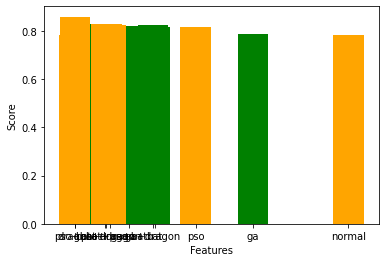

In [ ]:
plt.bar(plt_x, plt_y, tick_label=tick_label,
        width=76, color=['orange', 'green'])
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

In [ ]:
print("Without scaling: ")
urls = {'normal':"https://raw.githubusercontent.com/saranshtaneja/genetic_major/master/fb_dataset.csv",
        'ga':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_ga.csv',
        'pso':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_pso.csv',
        'bat':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_bat.csv',
        'dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_dragon.csv',
        'ga+bat':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_ga%2Bbat.csv',
        'pso+bat':'https://github.com/manan-arya/Major_Project/raw/pso%2B/after_pso%2Bbat.csv',
        'ga+dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_ga%2Bdragon.csv',
        'pso+dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_pso%2Bdragon.csv',
        'bat+dragon':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_bat%2Bdragon.csv',
        'bat+pso':'https://raw.githubusercontent.com/manan-arya/Major_Project/pso%2B/after_bat%2Bpso.csv'
        }
for name, url in urls.items():
  data = pd.read_csv(url)
  y = data.iloc[0:,data.shape[1]-1].values
  X = data.iloc[0:,:data.shape[1]-1].values
  sc_x=StandardScaler()
  sc_y=StandardScaler()
  x=sc_x.fit_transform(X)
  y=sc_y.fit_transform(y.reshape(-1,1))
  y=y.ravel()
  svm = SVR(kernel='rbf',C = 10000)
  #clf = GridSearchCV(svr, parameters)
  #clf.fit(x, y)
  #GridSearchCV(estimator=svr,
  #            param_grid={'C': [1, 10000], 'epsilon': [0,2]})
  #score = np.mean(cross_val_score(svr, x, y,  cv=5,  scoring=None))
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  svm = svm.fit(X_train, y_train)
  score = svm.score(X_test,y_test)
  print(str(name)+' '+str(score)+' features: '+str(data.shape[1]))

Without scaling: 
normal 0.06572875249279764 features: 702
ga 0.9589618254939104 features: 467
pso 0.9586412106350963 features: 326
bat 0.9618128800273178 features: 224
dragon 0.9779467886386511 features: 28
ga+bat 0.9603978773442073 features: 161
pso+bat 0.8954814898651123 features: 27
ga+dragon 0.9616023238608468 features: 220
pso+dragon 0.9583018977563926 features: 115
bat+dragon 0.9569097684013007 features: 103
bat+pso 0.954170589638352 features: 105
